# 비선형 회귀(Nonlinear Regression) - 3차 함수
* 선형 회귀로는 표현할 수 없는 데이터의 경향성을 설명하기 위한 회귀
* 다항식을 이용한 회귀를 다항 회귀(Polynomial Regression) : 회귀선이 직선이 아닌 2차 함수 3차 함수 등의 곡선으로 표현

In [15]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

#### 데이터 설정 

In [16]:
X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]
print(len(X))

a = tf.Variable(tf.random.normal([1], 0, 1))
b = tf.Variable(tf.random.normal([1], 0, 1))
c = tf.Variable(tf.random.normal([1], 0, 1))
d = tf.Variable(tf.random.normal([1], 0, 1))
print(a, b, c, d)

16
<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([-0.62590146], dtype=float32)> <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.05049784], dtype=float32)> <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([-0.37487367], dtype=float32)> <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.164672], dtype=float32)>


#### 가설
* 2차 함수에 대한 다항식을 가설로 사용한다. --> 1차 함수인 경우엔 1차 함수를 가설로 사용한다. 

In [18]:
def hypothesis(X):
    return a * np.power(X, 3) + b * np.power(X, 2) + c * X + d

hypothesis(X)

<tf.Tensor: shape=(16,), dtype=float32, numpy=
array([  0.03985536,   0.7848191 ,  -1.4795367 ,   0.15345433,
        -1.0452216 ,   0.06895854,   0.2662028 ,   0.4170006 ,
         0.7690096 ,   0.3419922 ,   0.90418106,   0.36999667,
         0.2818888 ,   0.15718973,   0.75349927, -12.255341  ],
      dtype=float32)>

#### 비용함수
* 전차의 제곱의 평균을 비용으로 계산한다.
* Y : 실제 값
* y_pred : hypothesis(X)에 의해 계산된 기대 값

In [19]:
def loss_fn():
    y_pred = hypothesis(X)
    loss = tf.reduce_mean(tf.square(Y - y_pred))
    return loss
loss_fn()

<tf.Tensor: shape=(), dtype=float32, numpy=281.19598>

#### 최적화 수행
* 손실을 최소화 하는 것이 목표
* optimizer는 복잡한 미분과 가중치 업데이트를 자동으로 해주는 편리한 도구
* lr(learning rate-학습률) : 적당한 학습률을 넣으면 안정적이고 효율적으로 학습 수행(보통 0.1 ~ 0.0001 사이의 수 사용)

In [20]:
optimizer = tf.optimizers.Adam(lr=0.07)

#### 학습
* optimizer.minimize(loss_fn, var_list = vars)
* loss_fn : 최소화할 손실
* var_list = vars : 학습시킬 변수의 리스트

In [21]:
for i in range(1001):
    optimizer.minimize(loss_fn, var_list = [a, b, c])  
    loss = loss_fn()
    if i % 100 == 0:
        print(i, 'a:', a.numpy(), 'b:', b.numpy(), 'c:', c.numpy(), 'loss:', loss.numpy())

0 a: [-0.5558994] b: [0.12049994] c: [-0.30487162] loss: 274.03308
100 a: [-0.1494418] b: [4.476517] c: [-4.620728] loss: 182.96426
200 a: [-1.3187237] b: [8.378903] c: [-6.614762] loss: 158.21535
300 a: [-2.607567] b: [11.591107] c: [-6.2159214] loss: 144.7782
400 a: [-3.7092962] b: [14.121671] c: [-5.357068] loss: 137.38458
500 a: [-4.531782] b: [15.989483] c: [-4.663778] loss: 133.85794
600 a: [-5.0928097] b: [17.263521] c: [-4.1905036] loss: 132.40753
700 a: [-5.4461856] b: [18.066334] c: [-3.8930998] loss: 131.89154
800 a: [-5.652196] b: [18.534424] c: [-3.7198653] loss: 131.7326
900 a: [-5.7634377] b: [18.787193] c: [-3.626346] loss: 131.69023
1000 a: [-5.819063] b: [18.913588] c: [-3.579586] loss: 131.68048


#### 그래프 그리기

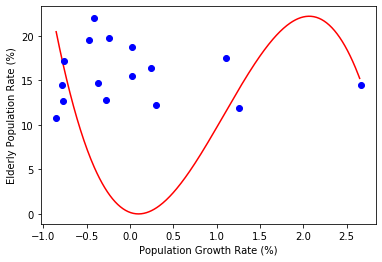

In [22]:
line_x = np.arange(min(X), max(X), 0.01)
line_y = hypothesis(line_x)

# 그래프를 그립니다.
plt.plot(line_x,line_y,'r-')
plt.plot(X,Y,'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

#### 확인
* 3차 함수가 그려졌지만 데이터의 성향을 잘 표현한다고 하기 어렵다. 이유는 손실의 값이 기존의 함수들 보다 크기 때문이다. 
* 차수를 3차 이상으로 늘릴 수도 있고, 분수, 지수, ex, logx 등을 회귀식에 추가할 수 있다. 
* 어느 것이 적절한 회귀식인지 즉시 알기 어렵기 때문에 식을 계속 바꿔보며 최적의 회귀식을 찾기 위해 노력해야 한다. 